In [ ]:
!git clone https://github.com/iam-smjamilsagar/Age-And-Gender-Detection.git

Cloning into 'Age-And-Gender-Detection'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 29 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [ ]:
%cd Age-And-Gender-Detection

/content/Age-And-Gender-Detection


In [ ]:
!gdown https://drive.google.com/uc?id=1_aDScOvBeBLCn_iv0oxSO8X1ySQpSbIS
!unzip modelNweight.zip

Downloading...
From: https://drive.google.com/uc?id=1_aDScOvBeBLCn_iv0oxSO8X1ySQpSbIS
To: /content/modelNweight.zip
100% 86.2M/86.2M [00:00<00:00, 115MB/s]
Archive:  modelNweight.zip
   creating: modelNweight/
  inflating: modelNweight/age_deploy.prototxt  
  inflating: modelNweight/age_net.caffemodel  
  inflating: modelNweight/gender_deploy.prototxt  
  inflating: modelNweight/gender_net.caffemodel  
  inflating: modelNweight/opencv_face_detector.pbtxt  
  inflating: modelNweight/opencv_face_detector_uint8.pb  


In [ ]:
import cv2 as cv
import math
import time
from google.colab.patches import cv2_imshow
import pandas as pd
import numpy as np 

In [ ]:
def getFaceBox(net, frame, conf_threshold=0.999):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes

faceProto = "modelNweight/opencv_face_detector.pbtxt"
faceModel = "modelNweight/opencv_face_detector_uint8.pb"

ageProto = "modelNweight/age_deploy.prototxt"
ageModel = "modelNweight/age_net.caffemodel"

genderProto = "modelNweight/gender_deploy.prototxt"
genderModel = "modelNweight/gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0, 2)', '(4, 6)', '(8, 12)', '(15, 20)', '(25, 32)', '(38, 43)', '(48, 53)', '(60, 100)']
genderList = ['Male', 'Female']

# Load network
ageNet = cv.dnn.readNet(ageModel, ageProto)
genderNet = cv.dnn.readNet(genderModel, genderProto)
faceNet = cv.dnn.readNet(faceModel, faceProto)

padding = 20

def age_gender_detector(imagen):
    # Read frame
    frame = cv.imread(imagen)
    t = time.time()
    frameFace, bboxes = getFaceBox(faceNet, frame)
    
    for bbox in bboxes:
        # print(bbox)
      face = frame[max(0,bbox[1]-padding):min(bbox[3]+padding,frame.shape[0]-1),max(0,bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]

      blob = cv.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
      genderNet.setInput(blob)
      genderPreds = genderNet.forward()
      gender = genderList[genderPreds[0].argmax()]
      ageNet.setInput(blob)
      agePreds = ageNet.forward()
      age = ageList[agePreds[0].argmax()]
      label = "{},{}".format(gender, age)
      Gender_results1.append(gender)
      Age_results1.append(age)
      Path_results1.append(imagen)
      print(age)
      print(gender)
      print(imagen)
      cv.putText(frameFace, label, (bbox[0], bbox[1]-10), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv.LINE_AA)

    return frameFace

(25, 32)
Male
1.jpg


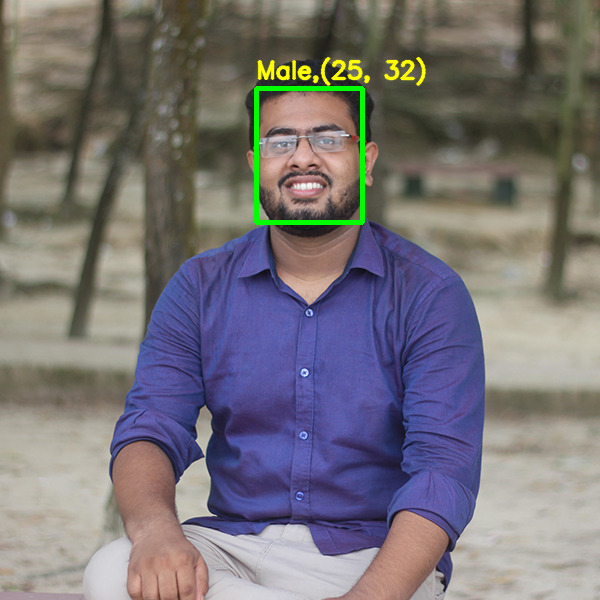

In [ ]:
#Just to check that everything is in order!
#input = "1.jpg"
#output = age_gender_detector(input)
#cv2_imshow(output)

In [ ]:
#!tar -xvf "/content/Age-And-Gender-Detection/wiki_crop.tar" -C "/content/Age-And-Gender-Detection" 
#uncoment only if you have the 

Se han truncado las últimas 5000 líneas del flujo de salida.
wiki_crop/92/30943192_1890-04-19_1954.jpg
wiki_crop/92/30949092_1943-11-23_1968.jpg
wiki_crop/92/30991792_1921-11-16_1954.jpg
wiki_crop/92/4096292_1970-02-17_2006.jpg
wiki_crop/92/709692_1958-05-03_2011.jpg
wiki_crop/92/909392_1959-02-09_2014.jpg
wiki_crop/92/11942292_1980-02-25_2009.jpg
wiki_crop/92/11955692_1955-09-10_1977.jpg
wiki_crop/92/2194592_1963-09-28_2007.jpg
wiki_crop/92/31935592_1931-08-31_1967.jpg
wiki_crop/92/31959792_1959-04-16_1984.jpg
wiki_crop/92/3196992_1977-07-08_2012.jpg
wiki_crop/92/41970292_1997-05-26_2012.jpg
wiki_crop/92/5194492_1983-04-02_2014.jpg
wiki_crop/92/1290492_1942-12-20_1997.jpg
wiki_crop/92/22989292_1983-07-01_2014.jpg
wiki_crop/92/32944792_1990-12-24_2013.jpg
wiki_crop/92/7297492_1980-07-12_2013.jpg
wiki_crop/92/13937192_1890-12-12_1970.jpg
wiki_crop/92/1399192_1967-12-06_2009.jpg
wiki_crop/92/2398292_1979-08-12_2011.jpg
wiki_crop/92/33928292_1982-02-14_2011.jpg
wiki_crop/92/149692_1973-07

In [ ]:
Gender_results1 = []
Age_results1 = []
Path_results1 = []

In [ ]:
df = pd.read_csv("ExperimentInput.csv")
#shift
df = df.sample(frac=1).reset_index(drop=True)
#take sample 
df_test = df.iloc[:10000]


In [ ]:
for i in range(0,10000):
  input = df_test['path'].values[i]
  output = age_gender_detector(input)
  #cv2_imshow(output) 

Se han truncado las últimas 5000 líneas del flujo de salida.
Male
wiki_crop/28/36987328_1957-07-12_1970.jpg
(60, 100)
Male
wiki_crop/99/1630499_1933-09-22_2009.jpg
(38, 43)
Male
wiki_crop/92/6818192_1986-02-05_2012.jpg
(8, 12)
Female
wiki_crop/87/147187_1905-01-21_2005.jpg
(38, 43)
Male
wiki_crop/41/13022541_1983-07-05_2011.jpg
(25, 32)
Male
wiki_crop/66/4743966_1923-03-29_1951.jpg
(60, 100)
Female
wiki_crop/43/44259143_1968-05-22_2009.jpg
(8, 12)
Male
wiki_crop/32/29383932_1968-09-01_2012.jpg
(25, 32)
Male
wiki_crop/44/6127744_1972-06-04_2014.jpg
(8, 12)
Male
wiki_crop/04/904104_1986-10-09_2005.jpg
(8, 12)
Male
wiki_crop/42/603942_1963-11-07_2012.jpg
(8, 12)
Male
wiki_crop/80/42984780_1987-12-20_2013.jpg
(25, 32)
Male
wiki_crop/92/25046692_1984-12-14_2011.jpg
(25, 32)
Male
wiki_crop/81/174281_1914-05-28_1943.jpg
(8, 12)
Female
wiki_crop/27/2854627_1964-04-17_2014.jpg
(48, 53)
Female
wiki_crop/42/7902442_1975-07-08_2014.jpg
(25, 32)
Male
wiki_crop/48/41279748_1983-02-28_2014.jpg
(38, 4

In [ ]:
from google.colab import files

df_test.to_csv('WikiSample.csv')
files.download('WikiSample.csv')


#Note: estimated_1 is the result of merging Gender_results1 and Age_results1 into a dataframe. You have to do that yourself.
estimated_experiment1.to_csv('estimated_1.csv')
files.download('estimated_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>